*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

This notebook introduces the concept and methodology of implementing Monte-Carlo Simulation.

# Monte-Carlo Simulation

> **Monte Carlo Simulation** is a technique to understand the impact of risk and uncertainty in 
finance, engineering, supply chain, and virtually anything. A Monte Carlo simulator helps
one to visualize most or all of the potential outcomes to have a better idea regaring the
risk of a decision.

Based on historical data, expertise in the field, or past experience, you can draw an estimate of a population. While this estimate is useful for developing a model, it contains some inherent uncertainty and risk, because it's an estimate of an unknown value. In a financial market, you might know the distribution of possible values through the mean and standard deviation of returns. By using a range of possible values, instead of a single guess, you can create a more realistic picture of what might happen in the future. 

Let's assume that your consultant recommended you a certain investment program that has a mean return rate of 10% and standard deviation of 5%. You made 100 investments through this program, but your 100 investments had an average rate of return of 3%. Did the consultant lie to you, or is it one of the possible corner cases that you can have if you are unlucky? What is the P10, P50, P90 value of this invertment program? What is the the most plausible *range* of rate of return? Does your 3% rate of return fall within that *range*?

Monte-Carlo simulation comes in handy when addressing uncertainty of such cases with a known distribution.


## 1. Casino Dice Roll Example

How do casinos earn money? The answer is simple - the longer you play, the bigger chance of you losing money.

Let's assume an imaginary dice roll game between a casino house and an imaginary player. The rules are simple:

1. There is an imaginary dice that rolls between 1 to 100.
2. If a player rolls between 1 to 51, the house wins.
3. If a player rolls between 52 to 100, the house wins.
4. A player can bet as many times as he wants.

With the above rules, **the house has 2% higher chance of winning over a player**. As a financial analyst of the house, you want to address the following questions:

<div class="alert alert-info">
    <p><b>Question 1: </b>What is the typical range (uncertainty) of profit from the Dice Roll game?</p>
    <p><b>Question 2: </b>With $100 wager for each bet, how many bets will be required until a player loses all his money?</p>
</div>

Monte-Carlo simulation can be used to simulate the possible outcomes of dice roll game.

### 1.0 Game Simulator Scripts

**Imports**

In [164]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

** Dice Roll Simulation **

In [153]:
def rolldice():
    dice = random.randint(1,100)
    if dice <= 51:                     # Player loses
        return False
    elif dice > 51 & dice <= 100:      # Player wins
        return True

** Single Game Simulation **

In [154]:
def play(total_funds, wager_amount, total_plays, final_fund):

    play_num = []       # x-axis of the plot
    funds = []          # y-axis of the plot

    play = 1
    while play <= total_plays:
        
        if rolldice():                                # Player wins
            total_funds = total_funds + wager_amount  # updates current total funds
            play_num.append(play)
            funds.append(total_funds)

        else:                                         # Player loses
            total_funds = total_funds - wager_amount 
            play_num.append(play)
            funds.append(total_funds)
            
        play = play + 1

    final_fund.append(funds[-1])                      # final_fund contains the ending fund of all players
    
    return final_fund, play_num, funds          

** Results Visualization **

In [157]:
def simulate_visualize(init_money, bet, num_bet, num_players=1):      # simulates and generates a plot
    f, ax = plt.subplots()
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        ax.plot(num_play,funds_record)
        count += 1

    ax.set_title('Change in Player\'s Total Fund with Each Bet')
    ax.set_ylabel('Player\'s Fund ($)')
    ax.set_xlabel('Number of Bets')
    
    return ending_fund_all_players

In [158]:
def simulate(init_money, bet, num_bet, num_players=1):                # simulates, but does not plot
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        count += 1
    
    return ending_fund_all_players

### 1.1 One Monte-Carlo Simulation

Let's say than an imaginary player, 'Eric', visits the house and wants to play the Dice Roll Game. A Monte-Carlo simulation can be run to simulate the result of Eric's game.

The simulation will be run with the following conditions:

1. Eric starts with \$10,000
2. Eric bets \$100 each time
3. Eric plays the game 1,000 times


<IPython.core.display.Javascript object>


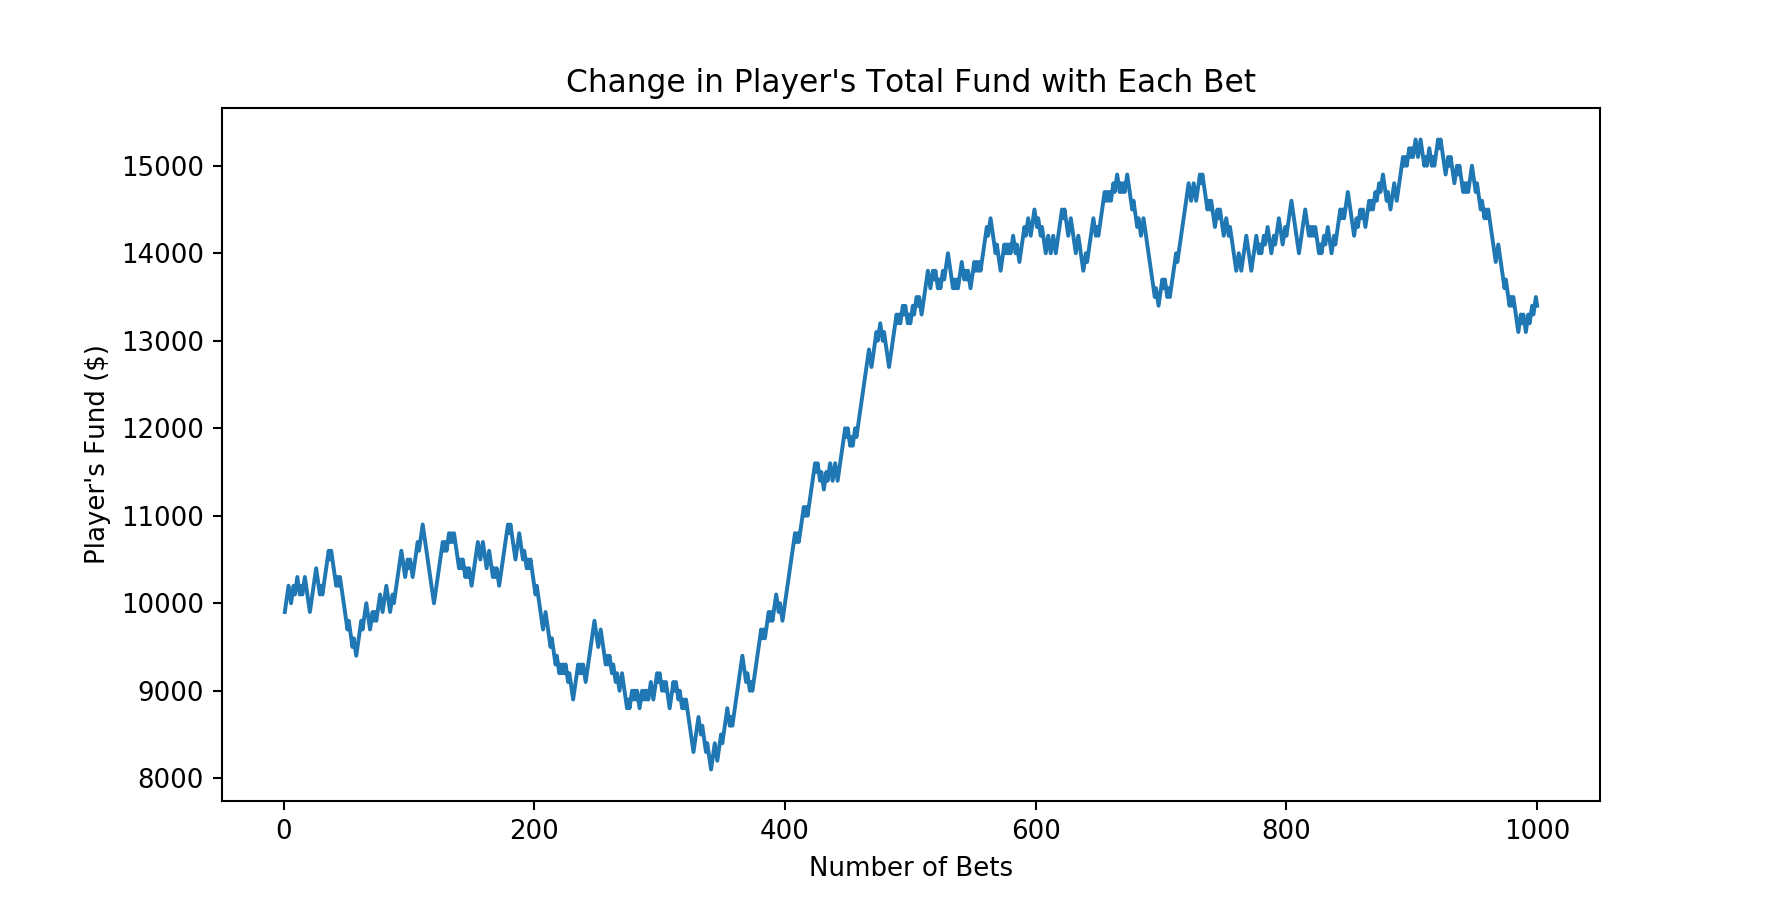

In [29]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=1)

Eric started with 10,000 dollars. To your surprise, Eric actually ended up earning money from the house by **3,500 dollars** after **1,000 games**. According to the configuration of the game, the house has 2% higher chance of winning over Eric. Therefore, with such a high number of games, like a thousand, the house was supposed to earn money from the player. But it was not the case here.

Was the configuration of the game wrong, or was Eric just really lucky?

### 1.1 Hundred Monte-Carlo Simulation

Eric earned $3,500 dollars after running 1,000 games. However, if hundred other players play the Dice Roll game for thousand times each, would the result be different? From the house's perspective, what is the expected profit from the Dice Roll game?

To get more accurate estimation of the expected profit, multiple Monte-Carlo simulation will be run. In this case, hundred.

The simulation will be run with the following conditions:

1. Hundred players each start with \$10,000
2. Hundred players bet \$100 each time
3. Hundred players play the game 1,000 times

<IPython.core.display.Javascript object>


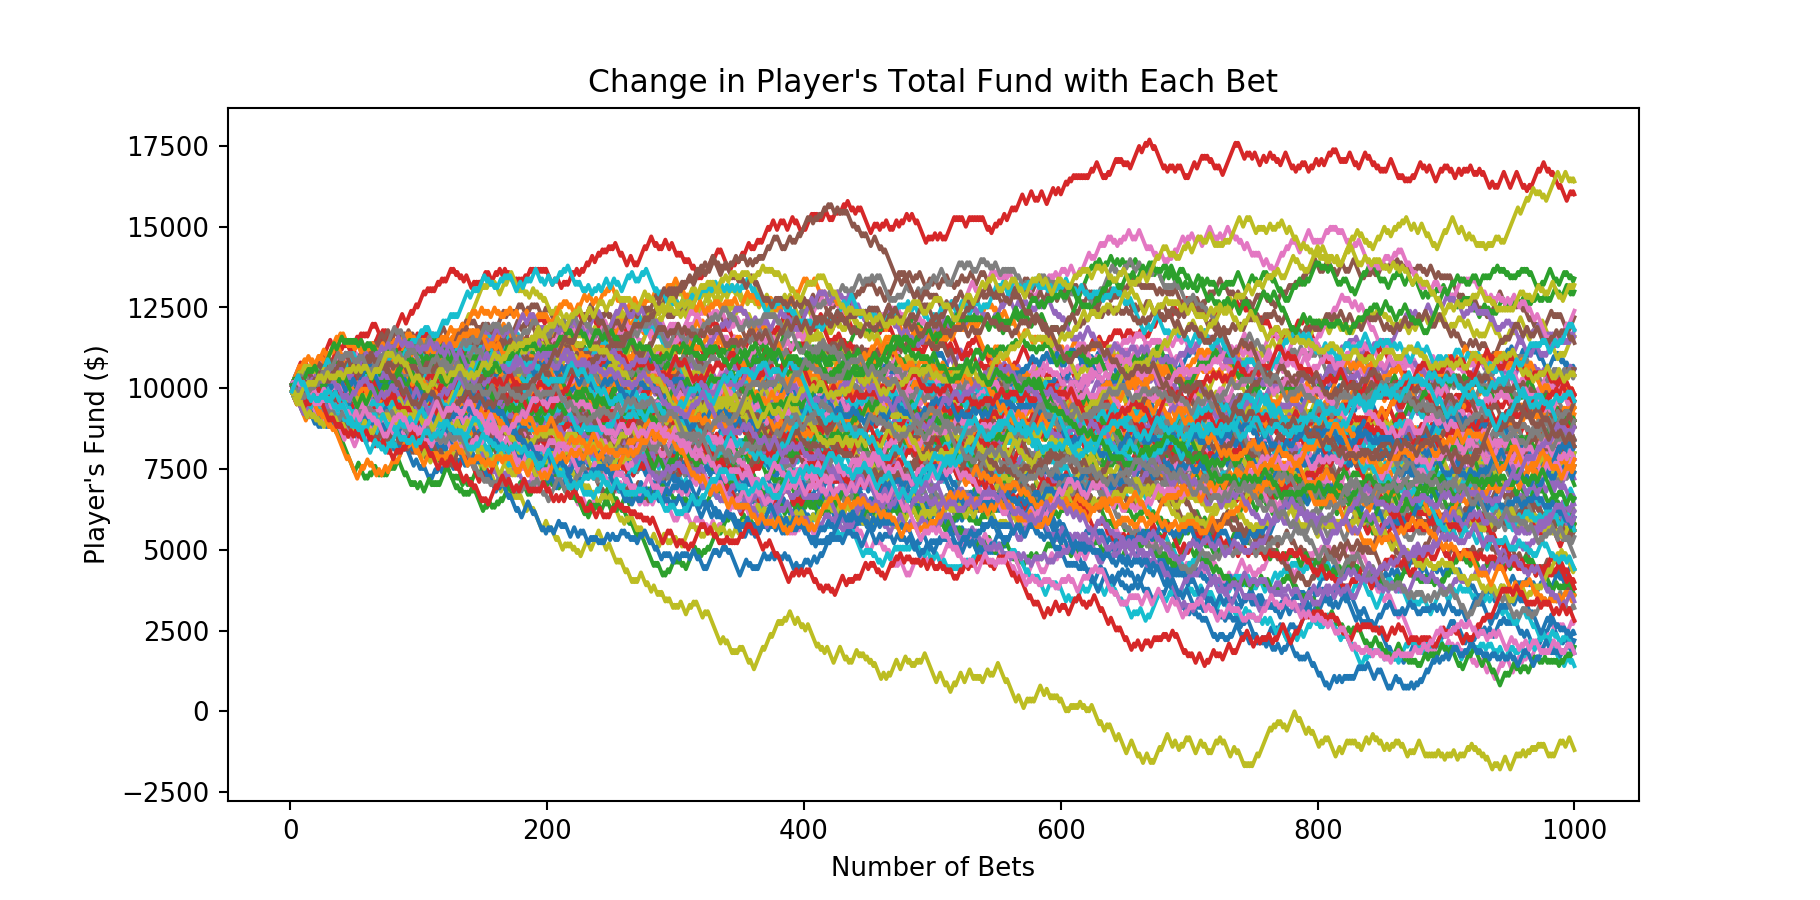

In [175]:
ending_fund = simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=100)

As it can be shown on the plots, Eric's earning **3,500 dollars** after 1,000 games was a plausible outcome. There was even a player who eanred **6,000 dollars**! However, this does not mean that the house will earn negative profit. The plot clearly indicates overall trend in the house earning money over the players as the number of bets increases. 

### 1.3 Uncertainty Modeling

The previous simulation results represents the outcome of 100 players each playing 1,000 Dice Roll games. One hundred Monte-Carlo simulations were run, and now we have one hundred samples of 1,000 game simulations data. 

To obtain more accurate uncertainty model for the Dice Roll game, further simulations will be run for hundred players each playing 100, 1,000, 10,000, and 100,000 games. 

In [240]:
df = pd.DataFrame()
for num_games in [100, 1000, 5000, 10000]:
    result = simulate(init_money=10000, bet=100, num_bet=num_games, num_players=1000)
    col_name = str(num_games) + ' Games'
    df[col_name] = result

<IPython.core.display.Javascript object>


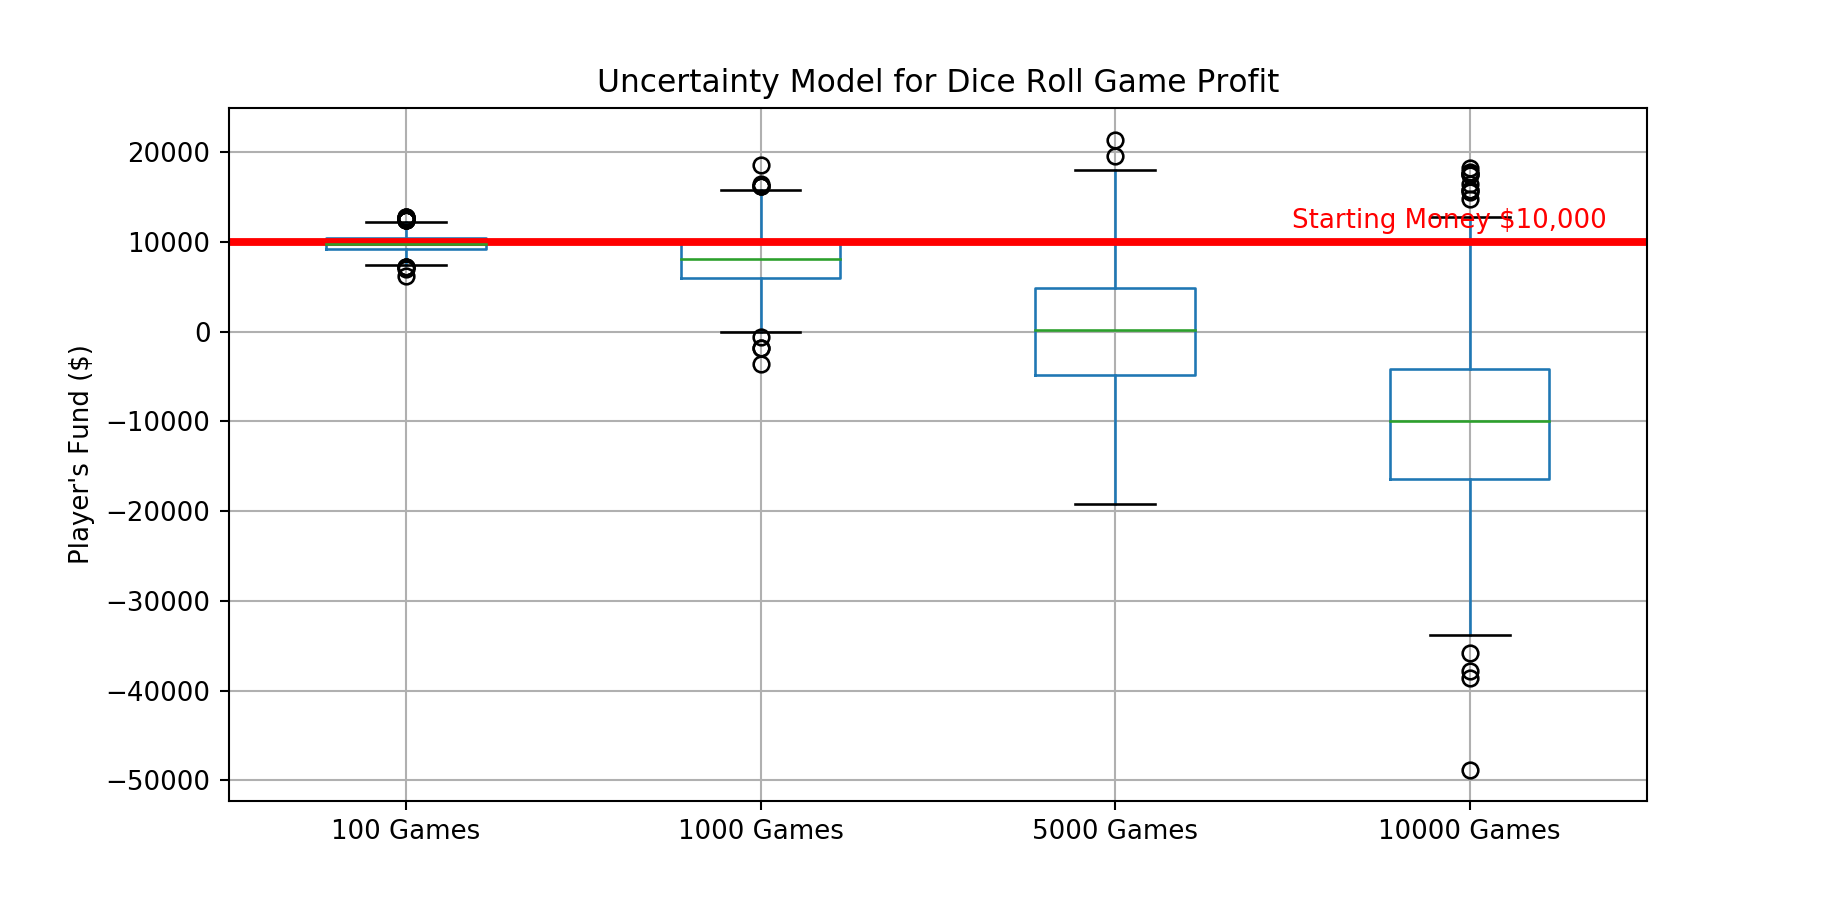

In [241]:
ax = df.boxplot()
ax.set_title('Uncertainty Model for Dice Roll Game Profit')
ax.set_ylabel('Player\'s Fund ($)')
ax.axhline(10000, color="red", linewidth=3);
ax.text(3.5, 11500, 'Starting Money $10,000', color='red');

<div class="alert alert-info">
    <p>The generated box plot is the uncertainty model for Dice Roll game profit generation. It answers <b>Question 1</b> that was asked above.</p>
</div>

Based on the box plot uncertainty model, you can confirm that the longer you play, the bigger chance of you losing money. Although some lucky players may earn over 50% profit at the casino, far bigger population of the players will end up losing money to the casino.

Recall that the Dice Roll game was configured so that the Casino has **2%** higher chance of winning the game over a player.

### 1.4 (Optional) Outlier Removal and Mean of the Prediction

The uncertainty model generated by Monte-Carlo simulations gives you a *range* of possible outcome. But what if you want a single *value* of the outcome? 

One simple way to address this question is to just calculate the average of the simulated data.

** Means of simulated data BEFORE outlier removal **

In [296]:
raw_mean = pd.DataFrame(df.describe().T['mean']).T
raw_mean.rename(index={'mean': 'original mean'}, inplace=True)
raw_mean

,100 Games,1000 Games,5000 Games,10000 Games
original mean,9815.6,8025.8,6.8,-10252.0


But as it can be observed in the boxplot, the simulated data contains outliers (circled points). One might want to remove these outliers before calculating the average of the data to improve accuracy. The traditional IQR outlier detection method can be implemented.

<p><center>IQR = P75 - P25</center></p>

<p><center>Lower Fence = P25 - 1.5 $\times$ IQR</center></p>

<p><center>Upper Fence = P75 + 1.5 $\times$ IQR</center></p>

In [261]:
outlier_detect = df.describe().T[['25%' , '75%']]
outlier_detect['IQR'] = outlier_detect['75%'] - outlier_detect['25%']
outlier_detect['Lower Fence'] = outlier_detect['25%'] - 1.5 * outlier_detect['IQR']
outlier_detect['Upper Fence'] = outlier_detect['75%'] + 1.5 * outlier_detect['IQR']

outlier_detect

,25%,75%,IQR,Lower Fence,Upper Fence
100 Games,9200.0,10400.0,1200.0,7400.0,12200.0
1000 Games,6000.0,10000.0,4000.0,0.0,16000.0
5000 Games,-4800.0,4800.0,9600.0,-19200.0,19200.0
10000 Games,-16400.0,-4200.0,12200.0,-34700.0,14100.0


** Means of simulated data AFTER outlier removal **

In [299]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: x if x > outlier_detect['Lower Fence'][column] else np.nan)
    df[column] = df[column].apply(lambda x: x if x < outlier_detect['Upper Fence'][column] else np.nan)

df = pd.DataFrame(df.describe().round(1).T['mean']).T
df.rename(index={'mean': 'outlier-removed mean'}, inplace=True)

pd.concat([raw_mean, df])

,100 Games,1000 Games,5000 Games,10000 Games
original mean,9815.6,8025.8,6.8,-10252.0
outlier-removed mean,9802.7,8030.3,-15.0,-10403.7
